스터디 자료: https://www.lucypark.kr/courses/2015-dm/text-mining.html
- - - 

### 1. Read document
- 영어: Jane Austen의 소설 Emma
- 한국어: 대한민국 국회 제 1809890호 의안

In [24]:
import nltk
nltk.download('gutenberg')
nltk.download('maxent_treebank_pos_tagger')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\heo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\heo\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


True

In [37]:
# English

from nltk.corpus import gutenberg   # Docs from project gutenberg.org
files_en = gutenberg.fileids()      # Get file ids
doc_en = gutenberg.open(u'austen-emma.txt').read()

In [5]:
# Korean

from konlpy.corpus import kobill    # Docs from pokr.kr/bill
files_ko = kobill.fileids()         # Get file ids
doc_ko = kobill.open('1809890.txt').read()

### 2. Tokenize
- 영어: ```nltk.tokenize.wordpunct_tokenize```
- 한국어: ```konlpy.tag.Twitter.morph```

##### 참고 : https://www.nltk.org/api/nltk.tokenize.html

In [69]:
# English

from nltk.tokenize import wordpunct_tokenize, blankline_tokenize
tokens_en = wordpunct_tokenize(doc_en)
# blankline_tokenize(doc_en)

In [6]:
# Korean

from konlpy.tag import Twitter; t = Twitter()
tokens_ko = t.morphs(doc_ko)

### 3. Load tokens with
- ```nltk.Text()``` : 문서 하나를 편리하게 탐색할 수 있는 다양한 기능을 제공

In [70]:
# English

en = nltk.Text(tokens_en)

In [7]:
# Korean

ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')   

- Tokens

In [71]:
# English

print(len(en.tokens))       # 토큰 수(문서길이)
print(len(set(en.tokens)))  # 고유 토큰 수
en.vocab()                  # 빈도 분포

192427
7811


FreqDist({',': 11454, '.': 6928, 'to': 5183, 'the': 4844, 'and': 4672, 'of': 4279, 'I': 3178, 'a': 3004, 'was': 2385, 'her': 2381, ...})

In [14]:
# Korean

print(len(ko.tokens))       # 토큰 수(문서길이)
print(len(set(ko.tokens)))  # 고유 토큰 수
ko.vocab()                  # 빈도 분포

1777
476


FreqDist({'\n\n': 127, '.': 49, '의': 46, '육아휴직': 38, '을': 28, '(': 27, ')': 26, '이': 25, '자': 24, '에': 23, ...})

- Plot frequency distributions

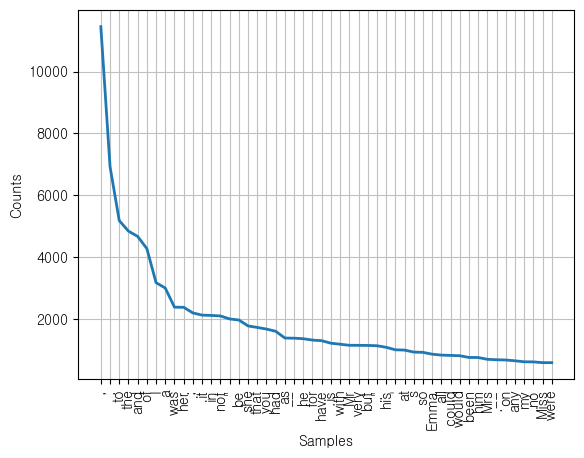

<Axes: xlabel='Samples', ylabel='Counts'>

In [72]:
en.plot(50)   # 상위 50개 정렬 빈도분포

In [18]:
# 한글폰트 지정
from matplotlib import font_manager, rc
font_fname = 'c:/windows/fonts/gulim.ttc'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family='gulim')

C:\Users\heo\.conda\envs\intown1\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8228 (\N{ONE DOT LEADER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


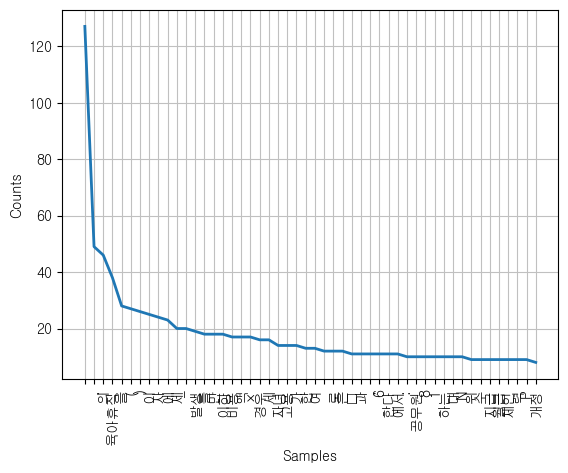

<Axes: xlabel='Samples', ylabel='Counts'>

In [19]:
ko.plot(50)

- Count

In [74]:
en.count('Emma')      # 발생 횟수

865

In [75]:
ko.count('초등학교')

6

- Dispersion plot (분산 플롯)

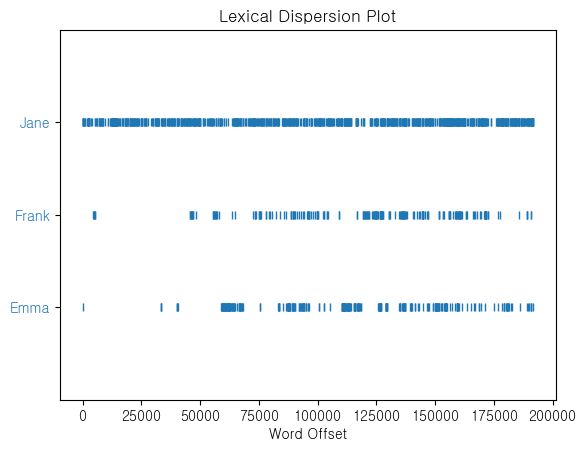

In [76]:
en.dispersion_plot(['Emma', 'Frank', 'Jane'])

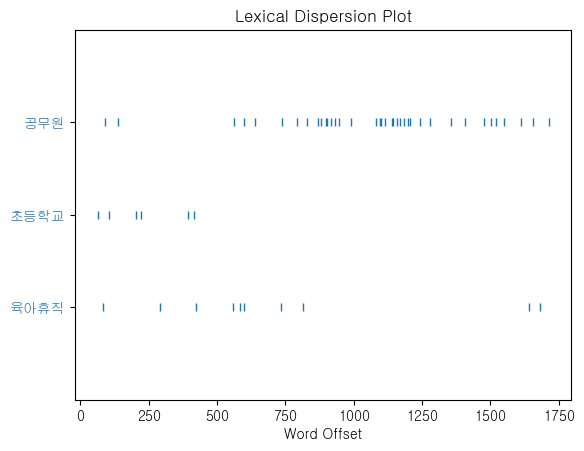

In [77]:
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

- Concordance

In [78]:
en.concordance('Emma', lines=5)

Displaying 5 of 865 matches:
[ Emma by Jane Austen 1816 ] VOLUME I CHAPT
ane Austen 1816 ] VOLUME I CHAPTER I Emma Woodhouse , handsome , clever , and 
both daughters , but particularly of Emma . Between _them_ it was more the int
 friend very mutually attached , and Emma doing just what she liked ; highly e
r own . The real evils , indeed , of Emma ' s situation were the power of havi


In [79]:
ko.concordance('초등학교')

Displaying 6 of 6 matches:
학송 의원 ( 10 인 ) 

 제안 이유 및 주요 내용 

   초등학교 저학년 의 경우 에도 부모 의 따뜻한 사랑 과 보살핌이 필요 


 을 할 수 있는 자녀 의 나이 는 만 6 세 이하 로 되어 있어 초등학교 저학년 인 자녀 를 돌보기 위 해서는 해당 부모님 은 일자리 를 
. 

 제 63조 제 2 항제 4 호 중 “ 만 6 세 이하 의 초등학교 취학 전 자녀 를 ” 을 “ 만 8 세 이하 ( 취학 중인 경우 
 전 자녀 를 ” 을 “ 만 8 세 이하 ( 취학 중인 경우 에는 초등학교 2 학년 이하 를 말 한다 ) 의 자녀 를 ” 

 로 한다 . 
 3 . ( 현행 과 같음 ) 

   4 . 만 6 세 이하 의 초등학교 취 

   4 . 만 8 세 이하 ( 취학 중인 경우 

 학 
취학 중인 경우 

 학 전 자녀 를 양육 하기 위 하 

 에는 초등학교 2 학년 이하 를 여 필요하거나 여자 공무원 이 말 한다 ) 의 


- Find similar words

In [84]:
en.similar('Emma')
print('-----------')
en.similar('Frank')

she it he i harriet you her jane him that me and all they them herself
there but be isabella
-----------
mrs mr emma harriet it you her she them he him hartfield jane that
isabella herself all i mind highbury


In [88]:
ko.similar('자녀')
print('-----------')
ko.similar('육아휴직')

논의
-----------



- Collocations (배열)

In [89]:
en.collocations()

Frank Churchill; Miss Woodhouse; Miss Bates; Jane Fairfax; Miss
Fairfax; every thing; young man; every body; great deal; dare say;
John Knightley; Maple Grove; Miss Smith; Miss Taylor; Robert Martin;
Colonel Campbell; Box Hill; said Emma; Harriet Smith; William Larkins


In [91]:
ko.collocations()

초등학교 저학년;      ③⋅④; 육아휴직 대상자


##### (Tagging and chunking)
이제 단어를 주어진 클래스, 즉 품사 태그로 분류 하고 텍스트를 더 큰 조각으로 분류해보자. 

### 4. POS tagging
하나의 문서는 파싱된 구조를 관찰하기에는 너무 길기 때문에 각 언어에 대해 하나의 짧은 문장을 사용한다.

In [1]:
# English

import nltk
nltk.download('averaged_perceptron_tagger')

tokens = "The little yellow dog barked at the Persian cat".split()
tags_en = nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\heo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# Korean

from konlpy.tag import Twitter; t = Twitter()
tags_ko = t.pos("작고 노란 강아지가 페르시안 고양이에게 짖었다")

C:\Users\heo\.conda\envs\intown1\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


### 5. Noun phrase chunking

In [3]:
# English

parser_en = nltk.RegexpParser("NP: {<DT>?<JJ>?<NN.*>*}")
chunks_en = parser_en.parse(tags_en)
chunks_en.draw()

In [22]:
# Korean

parser_ko = nltk.RegexpParser("NP: {<Adjective>*<Noun>*}")
chunks_ko = parser_ko.parse(tags_ko)
# chunks_ko.draw()

### Drawing a word cloud

In [31]:
from collections import Counter
from konlpy.tag import Okt
import numpy as np

okt = Okt()
nouns = okt.nouns(doc_ko) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

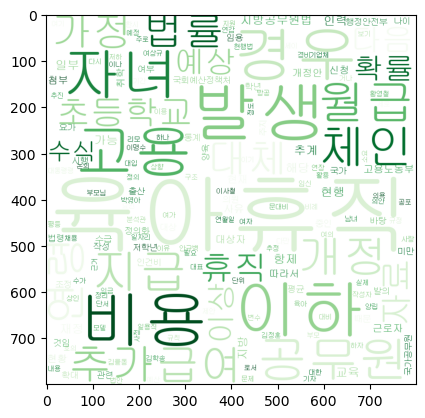

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
wc = WordCloud(font_path='gulim', 
               width=400, 
               height=400, 
               scale=2.0, 
               max_font_size=200,
               colormap='Greens',
               background_color='white')
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)